# Appentissage supervisé pour des données avec classes désequilibrées.

In [ ]:
import sys
assert sys.version_info >= (3, 7)

In [13]:
import pandas as pd
from src.core.Processing import Processing
from src.core.Analyser import Analyser
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cwd = Path.cwd()
data_path = cwd.parent.parent

print(data_path)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
file_path=f"{data_path}/data//whole_data.csv"
sep=","
outcome="Attrition"
positive_mod="Yes"

df=pd.read_csv(file_path,sep=sep)

And let's create the images/svm folder (if it doesn't already exist), and define the save_fig() function which is used through this notebook to save the figures in high-res

In [ ]:
IMAGES_PATH = Path() / "images" / "ueda"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Analyse exploratoire des données déséquilibrées

In [16]:
process=Processing() # object which do processing for df
analyzer=Analyser() #object which give graphics, statistics indicators for df

### Analyse exploratoire des attributs du dataset -_- Bank marketing

In [17]:
df.shape

(4410, 29)

In [ ]:
df.head()

In [18]:
process.summary(df)

{'Missing Values': EmployeeID                  0
 JobInvolvement              0
 PerformanceRating           0
 EnvironmentSatisfaction    25
 JobSatisfaction            20
 WorkLifeBalance            38
 Age                         0
 Attrition                   0
 BusinessTravel              0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 Gender                      0
 JobLevel                    0
 JobRole                     0
 MaritalStatus               0
 MonthlyIncome               0
 NumCompaniesWorked         19
 Over18                      0
 PercentSalaryHike           0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           9
 TrainingTimesLastYear       0
 YearsAtCompany              0
 YearsSinceLastPromotion     0
 YearsWithCurrManager        0
 dtype: int64,
 'Constant Features': ['EmployeeCount', 'Over18', 'StandardHours']}

The dimension of the dataframe is (4410,29).
It can be observed that there are missing values for the features "EnvironmentSatisfaction" (25), "JobSatisfaction" (20), "WorkLifeBalance" (38), and NumCompaniesWorked (19).
3 features are constant.

In [19]:
# processing -- imputation for missings values
df=process.preprocessing(df,method="imputation")

In [20]:
# processing -- remove constant features
df=process.remove_constant_features(df)

In [21]:
df.shape

(4410, 26)

In [22]:
process.summary(df)

{'Missing Values': EmployeeID                 0
 JobInvolvement             0
 PerformanceRating          0
 EnvironmentSatisfaction    0
 JobSatisfaction            0
 WorkLifeBalance            0
 Age                        0
 Attrition                  0
 BusinessTravel             0
 Department                 0
 DistanceFromHome           0
 Education                  0
 EducationField             0
 Gender                     0
 JobLevel                   0
 JobRole                    0
 MaritalStatus              0
 MonthlyIncome              0
 NumCompaniesWorked         0
 PercentSalaryHike          0
 StockOptionLevel           0
 TotalWorkingYears          0
 TrainingTimesLastYear      0
 YearsAtCompany             0
 YearsSinceLastPromotion    0
 YearsWithCurrManager       0
 dtype: int64,
 'Constant Features': []}

#### Adapted plot for class
---

No     3699
Yes     711
Name: Attrition, dtype: int64

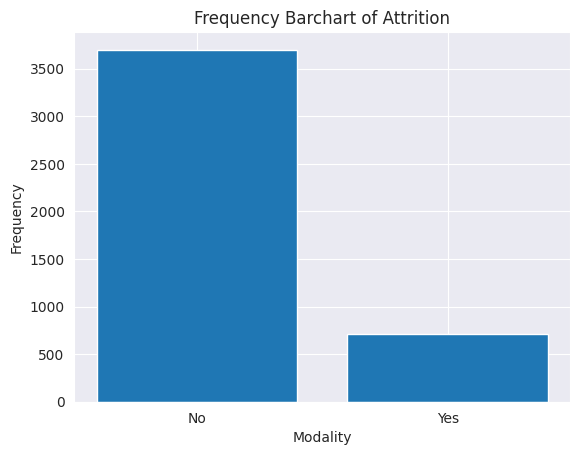

In [23]:
fig,ax=plt.subplots()
analyzer.bar_chart(df,outcome,ax)

##### Conclusion
We can see above that, Attrition attribute is imbalanced ( 711 rows for "Yes" modality and 3699 for "No" modality)

#### Adapted plot for numerical columns
---

##### Sacked Barplot

In [24]:
analyzer_summary=analyzer.summary(df)
quantitatives,qualitatives=analyzer_summary["features"]["quantitative_columns"],analyzer_summary["features"]["qualitative_columns"]

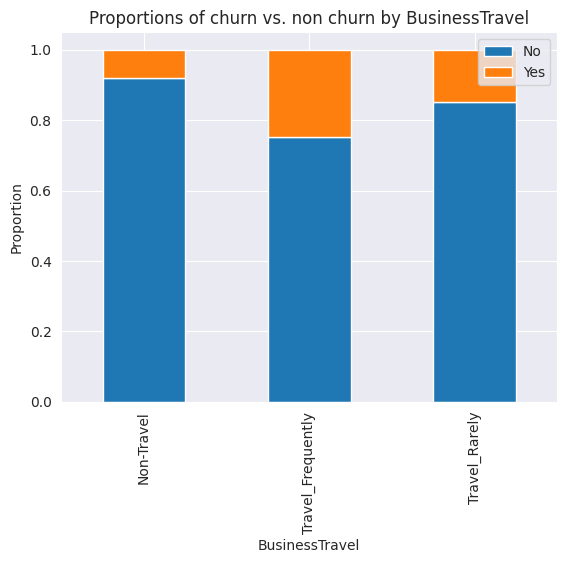

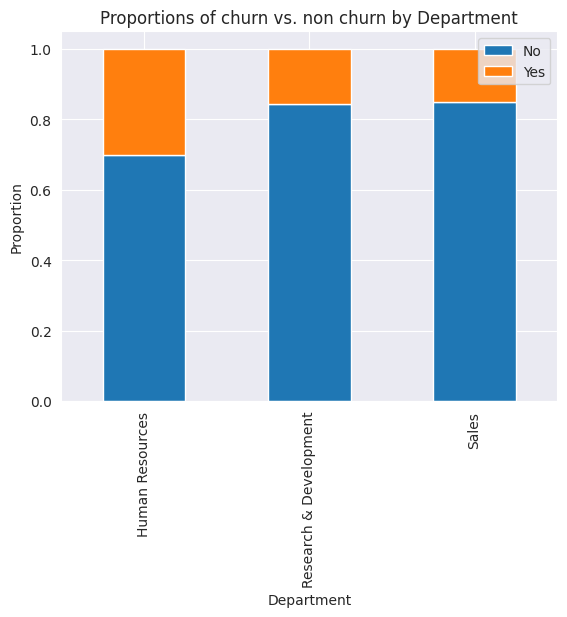

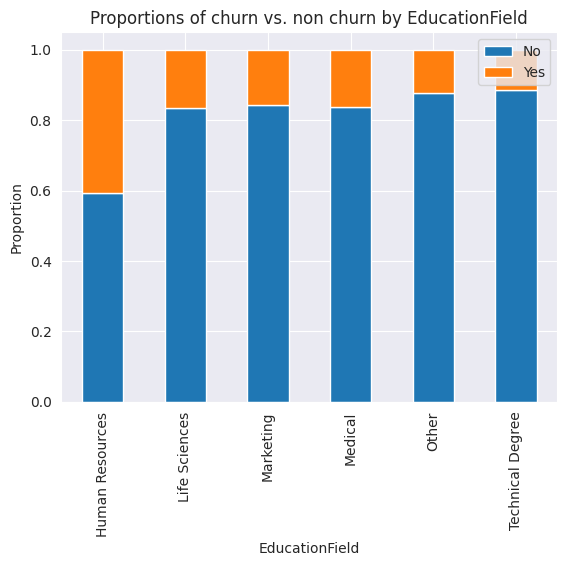

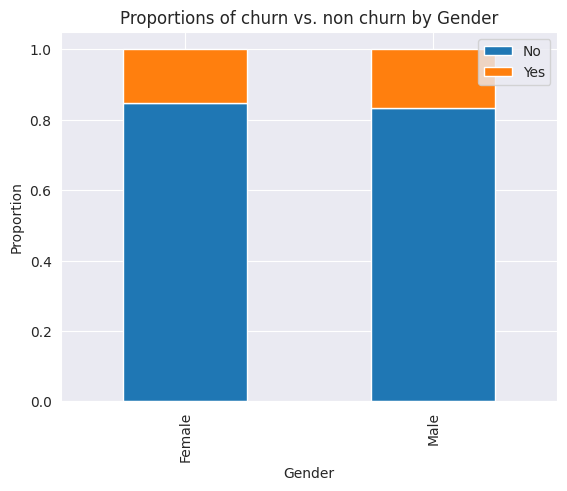

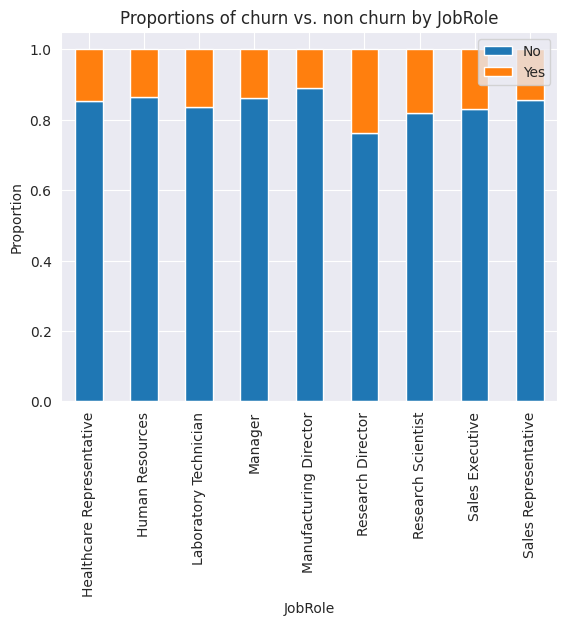

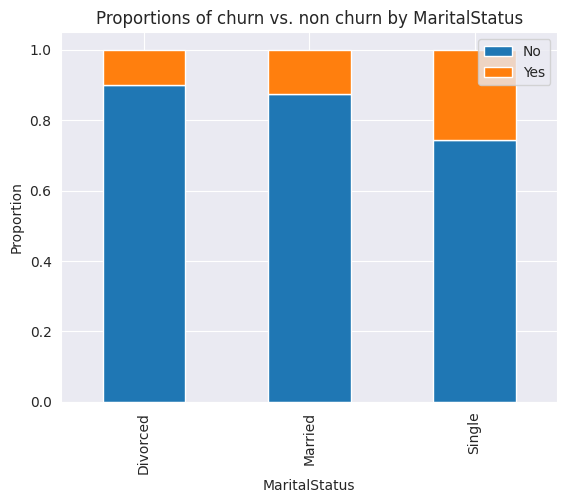

In [25]:
for c in analyzer.summary(df)["features"]["qualitative_columns"]:
    if c != outcome:
        analyzer.prop_churn_by_cats(df,outcome,c)

'BusinessTravel': a good influence, for peoples who don't travel, proportion of Yes Attrition is significantly less than others distributions
'Department': link between 'EducationField' and 'Department',distributon for "Human Ressources" department is not same than distributions for others modalities
'EducationField': influence, distribution for "Human Ressources" modality have more "Yes" for Attrition
'Gender': no influence, distributions are equals
'JobRole': influence because distributions are not same for some modalities
'MaritalStatus: little influence for "Single" attribute but distributions seems balanced rather than imbalanced

Conclusion:
'BusinessTravel', 'Department', 'JobRole' have influence
maybe also a little bit 'MaritalStatus'
(*):'EducationField' have a link with 'Department', we decided to remove it

##### Boxplot

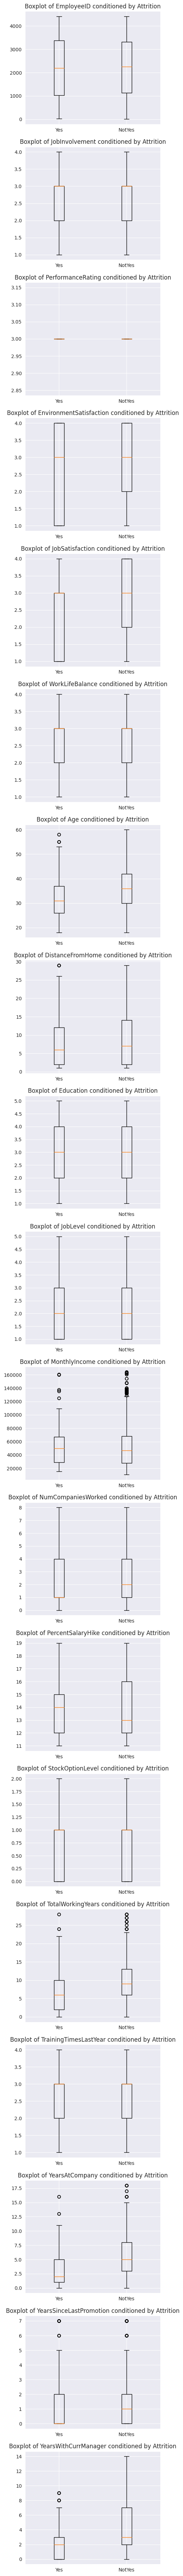

In [26]:
#we decided to remove outliers before boxplots creation
df=process.remove_outliers(df)
fig,axs=plt.subplots(nrows=len(quantitatives),figsize=(5,len(quantitatives)*5))
for i in range(len(quantitatives)):
    analyzer.prop_churn_by_numerical_boxplot(df,outcome,positive_mod,quantitatives[i],axs[i])

'EmployeeID': synthetic feature, not interesting
'JobInvolvement': no influence, identical distributions
'PerformanceRating': no influence, identical distributions
'EnvironmentSatisfaction': influence, "No" modality for attrition seem increase 'EnvironmentSatisfaction', it's seem logic
'JobSatisfaction': influence, quantile 75% are differents but identical medians
'WorkLifeBalance': no influence, identical distributions
'Age': influence, different median for distributions
'DistanceFromHome': a little bit influence, interquartile range differents for distributions
'Education': no influence, identical distributions
'JobLevel': no influence, identical distributions
'MonthlyIncome': a little bit influence, interquartile range differents for distributions
'NumCompaniesWorked': influence, different median for distributions
'PercentSalaryHike': influence, different median for distributions
'StockOptionLevel': no influence, identical distributions
'TotalWorkingYears': influence, different distributions
'TrainingTimesLastYear': no influence, identical distributions
'YearsAtCompany': influence, different median for distributions
'YearsSinceLastPromotion': influence, different median for distributions
'YearsWithCurrManager': influence, different distributions

##### Conclusion -relevant quantitative features:
YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany, TotalWorkingYears, PercentSalaryHike, NumCompaniesWorked, Age, JobSatisfaction, EnvironmentSatisfaction

#### Correlation Matrix
---

In [27]:
relevant_features_quanti=[
    "YearsWithCurrManager",
    "YearsSinceLastPromotion",
    "YearsAtCompany",
    "TotalWorkingYears",
    "PercentSalaryHike",
    "NumCompaniesWorked",
    "Age",
    "JobSatisfaction",
    "EnvironmentSatisfaction"
]
relevant_features_quali=[
    'BusinessTravel',
    'Department',
    'JobRole'
]
relevant_features=relevant_features_quanti+relevant_features_quali
df_new=df[[outcome]+relevant_features] #we decided to work with only relevant features for Attrition

<Axes: >

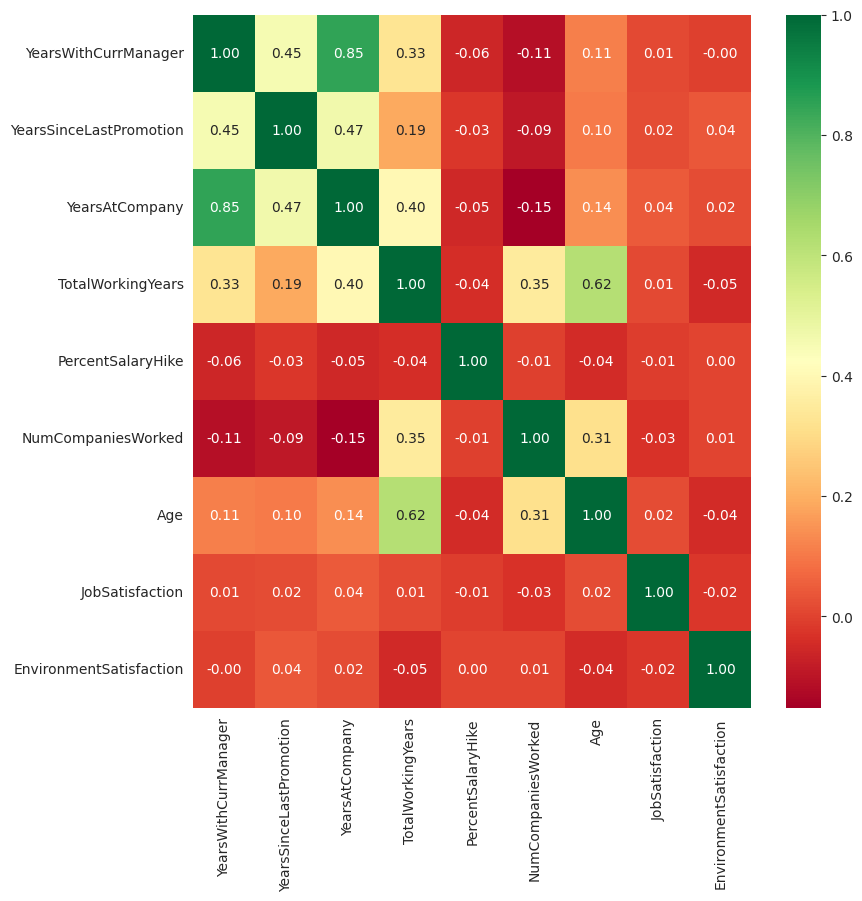

In [28]:
plt.figure(figsize=(9,9))
analyzer.correlation_heatmap(df_new,annot=True)

##### Correlation Matrix - Strength correlated features

In [29]:
correlations=df_new.corr(numeric_only=True)
groups={1:.3,2:.5,3:.5}
"""
high correlation (>=.5): group3
medium correlation (>=.3 and <.5): group2
low correlation (<.3):group1
"""
print()

In [30]:
dict_correlations={key:[] for key in groups.keys()}
for group in groups.keys():
    if group==1:
        rows, cols =np.where(np.abs(correlations) < groups[group])
    elif group==2:
        rows, cols =np.where((np.abs(correlations) < groups[group]) & (np.abs(correlations) >= groups[group-1]))
    elif group==3:
        rows, cols =np.where(np.abs(correlations) >= groups[group])
    dict_correlations[group]=[(correlations.index[row], correlations.columns[col], correlations.iloc[row, col]) \
                              for row, col in zip(rows, cols) if row != col]

In [31]:
{
    group_number: dict_correlations[group_number]
        for group_number in dict_correlations.keys()
}

{1: [('YearsWithCurrManager', 'PercentSalaryHike', -0.06101804877091935),
  ('YearsWithCurrManager', 'NumCompaniesWorked', -0.1144413079896632),
  ('YearsWithCurrManager', 'Age', 0.11139218100480652),
  ('YearsWithCurrManager', 'JobSatisfaction', 0.010893529792817333),
  ('YearsWithCurrManager', 'EnvironmentSatisfaction', -0.0038644976628041876),
  ('YearsSinceLastPromotion', 'TotalWorkingYears', 0.18953699776224991),
  ('YearsSinceLastPromotion', 'PercentSalaryHike', -0.025011308181781766),
  ('YearsSinceLastPromotion', 'NumCompaniesWorked', -0.09062920715817095),
  ('YearsSinceLastPromotion', 'Age', 0.10103217188348437),
  ('YearsSinceLastPromotion', 'JobSatisfaction', 0.01773177558473827),
  ('YearsSinceLastPromotion', 'EnvironmentSatisfaction', 0.03931198344894711),
  ('YearsAtCompany', 'PercentSalaryHike', -0.05346401355489929),
  ('YearsAtCompany', 'NumCompaniesWorked', -0.15142031085015006),
  ('YearsAtCompany', 'Age', 0.13817718119186792),
  ('YearsAtCompany', 'JobSatisfaction'

We can see that 'YearsWithCurrManager' and 'YearsAtCompany' have high correlations
'Age' and 'TotalWorkingYears' also with .62 (absolute value).
We remove 'YearsWithCurrManager' and 'Age'

In [32]:
removed_features=["YearsWithCurrManager","Age"]
relevant_features=[f for f in relevant_features if f not in removed_features]
df_new_=df_new[[outcome]+relevant_features]

In [33]:
process.summary(df_new_)

{'Missing Values': Attrition                  0
 YearsSinceLastPromotion    0
 YearsAtCompany             0
 TotalWorkingYears          0
 PercentSalaryHike          0
 NumCompaniesWorked         0
 JobSatisfaction            0
 EnvironmentSatisfaction    0
 BusinessTravel             0
 Department                 0
 JobRole                    0
 dtype: int64,
 'Constant Features': []}

In [34]:
analyzer.summary(df_new_)

{'features': {'qualitative_columns': ['Attrition',
   'BusinessTravel',
   'Department',
   'JobRole'],
  'quantitative_columns': ['YearsSinceLastPromotion',
   'YearsAtCompany',
   'TotalWorkingYears',
   'PercentSalaryHike',
   'NumCompaniesWorked',
   'JobSatisfaction',
   'EnvironmentSatisfaction']},
 'describe':        YearsSinceLastPromotion  YearsAtCompany  TotalWorkingYears  \
 count              2286.000000     2286.000000         2286.00000   
 mean                  1.422572        5.383202            9.53755   
 std                   1.948550        3.790944            5.97753   
 min                   0.000000        0.000000            0.00000   
 25%                   0.000000        2.000000            6.00000   
 50%                   1.000000        5.000000            9.00000   
 75%                   2.000000        8.000000           12.00000   
 max                   7.000000       18.000000           28.00000   
 
        PercentSalaryHike  NumCompaniesWorked  Job

## Prédiction de churn, Partie I

In [36]:
from src.core.ComputeModel import ComputeModel
from src.globals import MODEL_HYPERPARAMETERS_DEF
import copy

positive_mod="Yes"
models={"Logistic Regression":None,
        "SVM":None,
        "DecisionTreeClassifier":None
        }

In [37]:
#we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name,\
                                    hyperparameters=hyperparameters,positive_mod=positive_mod)
    models[model_name].fit()

/home/khaldi/.cache/pypoetry/virtualenvs/app-machine-WNt7oxYU-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


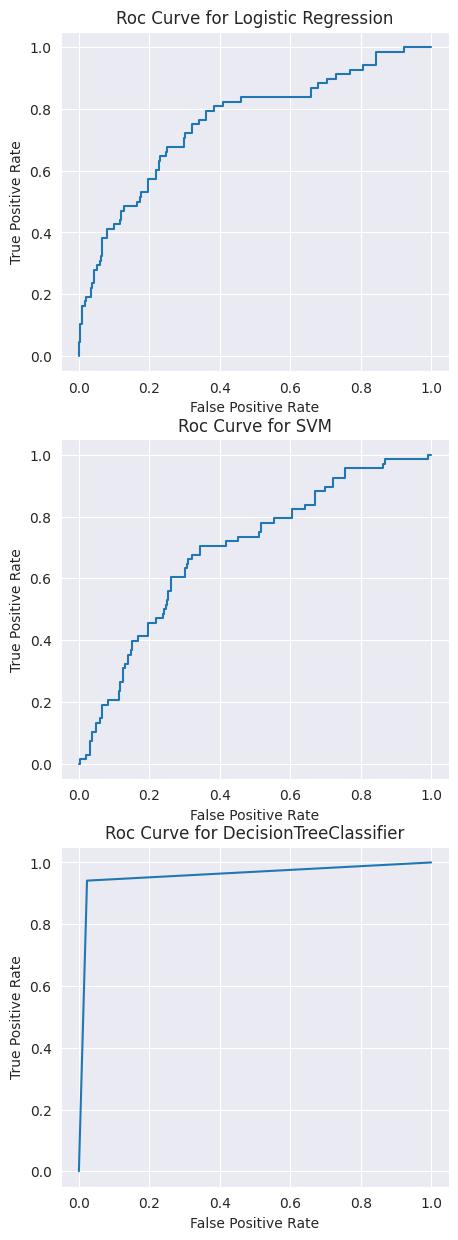

In [38]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}

In [39]:
metrics_default

{'Logistic Regression': {'auc': 0.7566742081447964,
  'accuracy': 0.8602620087336245,
  'precision': 0.6,
  'recall': 0.17647058823529413,
  'f1_score': 0.2727272727272727},
 'SVM': {'auc': 0.6911387631975867,
  'accuracy': 0.851528384279476,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 'DecisionTreeClassifier': {'auc': 0.959049773755656,
  'accuracy': 0.9716157205240175,
  'precision': 0.8767123287671232,
  'recall': 0.9411764705882353,
  'f1_score': 0.9078014184397163}}

In conclusion:
we set up three models, DecisionTreeClassifier, SVM, Logistic Regression:
we use AUC metrics because it's metrics that allow to see False positive Rate and True Positive Rate, and as dataset is imbalanced, accuracy in this case is not relevant
- We can see that  DecisionTreeClassifier is the best model because AUC of this model (~0.94) is significantly bigger than auc for 2 others models
- I think that DecisionTreeClassifier handle imbalanced dataset whereas Logistic Regression and SVM doesn't handle this kind of dataset:
    - Logistic Regression have lower recall (~0.1765) implies that they are a important proportion of false negative people, it's logic because dataset is imbalanced
      Logistic Regression don't handle imbalanced data, so if this model have as input, a lot of negative, predictions will tend to always be negative implies
      that false negatives people's increase
    - we can see SVM precision and recall are equal to 0, so model don't predict True positive for Attrition because dataset is imbalanced, and
      we can see SVM is more sensible for imbalanced dataset
    - IMPORTANT THING: to calculate AUC for SVM, we used min-max normalization, the code:
        - dist_to_hyperplan=self.model.decision_function(X)
            try:
                return (dist_to_hyperplan-dist_to_hyperplan.min())/(dist_to_hyperplan.max()-dist_to_hyperplan.min())
            except ZeroDivisionError:
                print(f"A problem occur during min-max normalization for testset:{X}")
- Simplify conclusion: DecisionTreeClassifier > Logistic Regression > SVM (with default hyperparameters)



In [40]:
params_grid= \
    {
        "Logistic Regression": \
            {
                "penalty": ["l1", "l2"],
                "C": np.logspace(-3, 3, 7),
                "solver": ["liblinear"],
                "multi_class": ["auto"],
                "n_jobs": [None],
                "max_iter": [100,150]
            },
        "SVM":
            {
                "kernel": ["poly", "rbf", "sigmoid"],
                "C": [0.1, 1, 10, 100],
                "degree": [3],
                "gamma": [1, 0.1, 0.01, 0.001]

            },
        "DecisionTreeClassifier":
            {
                "criterion": ["gini"],
                "splitter": ["best"],
                "max_depth": [None],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1],
                "min_weight_fraction_leaf": [0.],
                "max_features": [None],
                "random_state": [None],
                "max_leaf_nodes": [None]+list(range(2, 100)),
                "min_impurity_decrease": [0.],
                "class_weight": [None],
                "ccp_alpha": [0.]
            }

    }


In [41]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name,\
                                    positive_mod=positive_mod,grid_search=True,cv=3,params_grid=params_grid[model_name])
    models[model_name].fit()

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits


{'Logistic Regression': {'auc': 0.7530920060331826,
  'accuracy': 0.87117903930131,
  'precision': 0.9090909090909091,
  'recall': 0.14705882352941177,
  'f1_score': 0.25316455696202533},
 'SVM': {'auc': 0.9980769230769231,
  'accuracy': 0.9912663755458515,
  'precision': 1.0,
  'recall': 0.9411764705882353,
  'f1_score': 0.9696969696969697},
 'DecisionTreeClassifier': {'auc': 0.9552036199095022,
  'accuracy': 0.9650655021834061,
  'precision': 0.8421052631578947,
  'recall': 0.9411764705882353,
  'f1_score': 0.8888888888888888}}

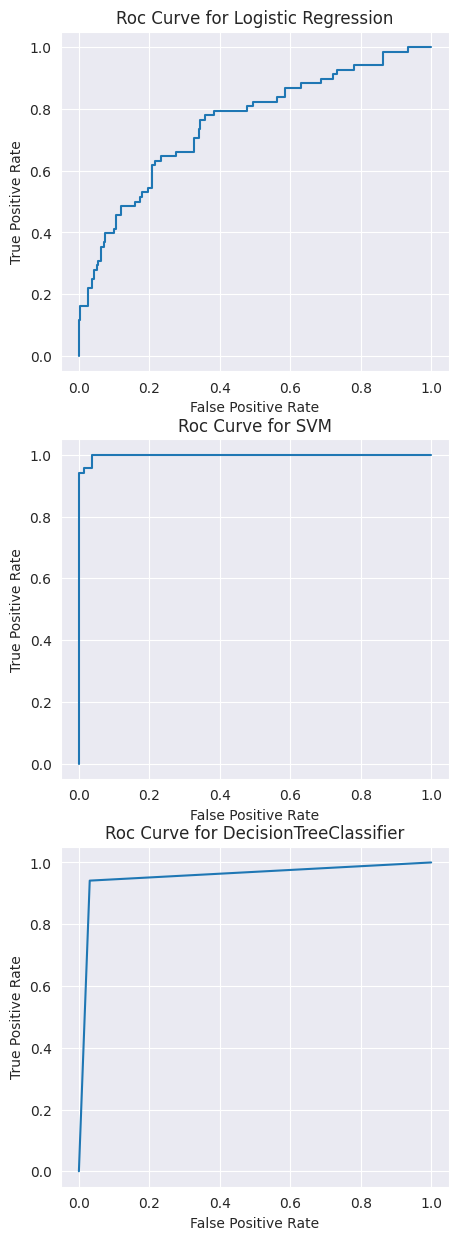

In [42]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics

In [43]:
resume_tuned=pd.DataFrame(metrics)
resume_default=pd.DataFrame(metrics_default)

In [44]:
pd.concat([resume_tuned.T,resume_default.T])\
    .reset_index()\
    .groupby("index")\
    .agg(lambda x:[a for a in x])
#first component of tuple is indicator for hyperparameters tuning

,auc,accuracy,precision,recall,f1_score
index,,,,,
DecisionTreeClassifier,"[0.9552036199095022, 0.959049773755656]","[0.9650655021834061, 0.9716157205240175]","[0.8421052631578947, 0.8767123287671232]","[0.9411764705882353, 0.9411764705882353]","[0.8888888888888888, 0.9078014184397163]"
Logistic Regression,"[0.7530920060331826, 0.7566742081447964]","[0.87117903930131, 0.8602620087336245]","[0.9090909090909091, 0.6]","[0.14705882352941177, 0.17647058823529413]","[0.25316455696202533, 0.2727272727272727]"
SVM,"[0.9980769230769231, 0.6911387631975867]","[0.9912663755458515, 0.851528384279476]","[1.0, 0.0]","[0.9411764705882353, 0.0]","[0.9696969696969697, 0.0]"


- We can see that SVM are significantly improve in term of performance (auc: 0.69 to .99)!, DecisionTreeClassifier stay at the same order of values.
  But with tuning, LogisticRegression, auc stay constant, but precision increase (0.6 to 0.9 after tuning), f1_score and recall decrease a little bit after tuning
- An important things: metrics after tuning are more reliable because a 3 fold cross validation are set up during training whereas with default hyperparameters this 3 cross validation was not done (1 test set and 1 training set), that's why some indicators don't increase after tuning.
- Conclusion: SVM now is better than other models with a very high value for all metrics with cross validation (3 fold cross validation)

In [45]:
hyperparameters_tuned={list(models.keys())[i]:models[list(models.keys())[i]].model.hyperparameters for i in range(len(models.keys()))}

In [46]:
best_model,hyperparameters=models["SVM"],hyperparameters_tuned["SVM"]

## Prédiction de churn, Partie II